In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [11]:
# Read the csv file into a pandas DataFrame# Read  
data = pd.read_json('data/tx_texas_zip_codes_geo.min.json')
data.head()

,features,type
0,"{'type': 'Feature', 'properties': {'STATEFP10'...",FeatureCollection
1,"{'type': 'Feature', 'properties': {'STATEFP10'...",FeatureCollection
2,"{'type': 'Feature', 'properties': {'STATEFP10'...",FeatureCollection
3,"{'type': 'Feature', 'properties': {'STATEFP10'...",FeatureCollection
4,"{'type': 'Feature', 'properties': {'STATEFP10'...",FeatureCollection


In [1]:
import json

def reader(stream):
    for line in stream:
        yield json.loads(line)

with open('data/tx_texas_zip_codes_geo.min.json') as src, open('outfile.json', 'w') as dst:
    for line in reader(src):
        dst.write(json.dumps(line))

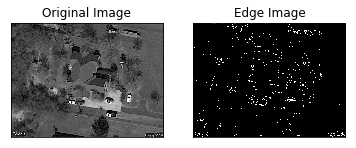

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('static/images/staticmap.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.savefig('roof.png')

In [4]:
img = cv2.imread('static/images/staticmap.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 7)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

True

/Users/anselmojrgarza/anaconda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


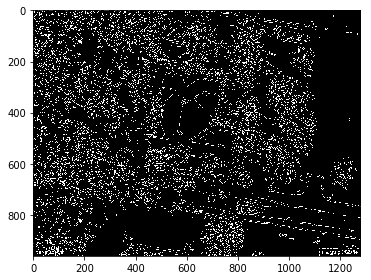

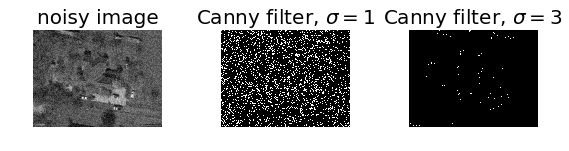

In [9]:
from skimage import io
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature
 
im = io.imread('static/images/staticmap.png', as_gray=True )
edges = feature.canny(im)
io.imshow(edges)
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()
io.show()